
## 선형회귀분석
- 미국 보스턴시의 주택가격 자료를 사용하여 아래 분석 실행.
    - 선형회귀분석 및 잔차 분석
    - 영향점 제거한 선형회귀분석
    - 변수선택법(best subset selection, 전진선택법, 후진선택법)
    
### Boston 자료 설명
- 자료 수는 506이고, 총 14개의 변수로 이루어져있다.
- 설명 변수: 마을의 평균 범죄율 (crim), 주거지 비율 (zn), 상업용지비율 (indus), 강 인접여부 (chas), 질소산화물의 농도 (nox), 집 당 평균 방의 수 (rm), 자가거주 주택 비율 (age), 보스턴의 5개 고용 중심지와의 가중 평균 거리 (dis), 고속도로 접근 지수 (rad), 10000달러 당 재산세 비율 (tax), 마을의 교사당 학생 비율 (ptratio), 마을의 흑인 비율 (black), 하층민의 비율 (lstat)
- 반응변수: 자가거주 주택의 중앙값 (medv)

### 데이터 불러오기

In [67]:
import pandas as pd
Boston = pd.read_csv("Boston.csv")
print('Data shape:', Boston.shape)
Boston = Boston.iloc[:, 1:]
Boston.head()

Data shape: (506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [70]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

train, test = train_test_split(Boston, test_size = 0.3, random_state = 42)
X_train, y_train = train.drop("medv", axis = 1), train.medv
X_train = sm.add_constant(X_train)
X_test, y_test = test.drop("medv", axis = 1), test.medv
X_test= sm.add_constant(X_test)

In [57]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals

In [103]:
linear_model = sm.OLS(y_train, X_train)
model_fit = linear_model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.96e-92
Time:                        15:42:42   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

In [124]:
linear_model2 = smf.ols('medv ~ crim+1' ,train).fit()
print(linear_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     59.57
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.23e-13
Time:                        15:50:24   Log-Likelihood:                -1266.9
No. Observations:                 354   AIC:                             2538.
Df Residuals:                     352   BIC:                             2546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5062      0.501     48.929      0.0

In [86]:
from statsmodels.tools.eval_measures import mse
y_test_pred = model_fit.predict(X_test)
print(y_test_pred.head(3))
print('Test MSE with all train data,',mse(y_test, y_test_pred))


173    28.648960
274    36.495014
491    15.411193
dtype: float64
Test MSE with all train data, 21.5174442312


In [81]:
import numpy as np

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal # 표준화하는 code
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)

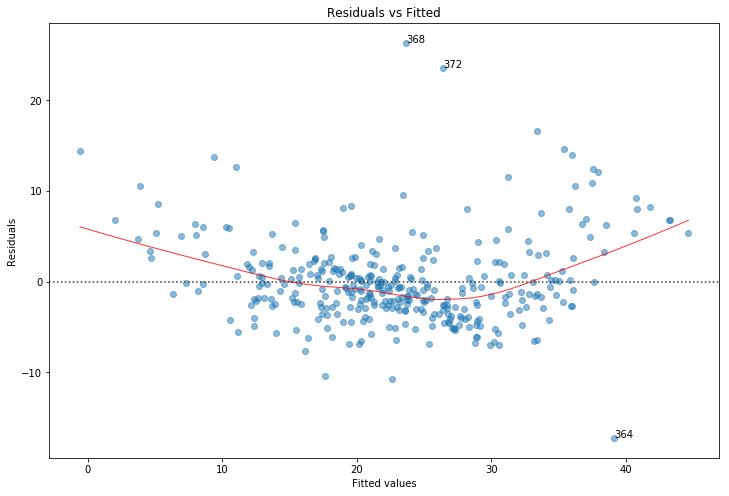

In [45]:
import seaborn as sns

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
# lowess는 빨간선 그어주는 옵션
sns.residplot(model_fitted_y, 'medv', data=train, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));
plt.show()

## 2. Linear regression with variable selection

- $R^2 = 1- \frac{SS_{res}}{SS_{tot}}$
where $SS_{tot} = \sum_i (y_i - \bar{y})^2 $, $ \bar{y} = \frac{1}{n} \sum_i y_i$, $SS_{res} = \sum_i (y_i - \hat{y}_i)^2 = \sum_i e_i^2$.

- $R^2_{adj} = 1-\frac{n-1}{n-p}(1-R^2)$

- $ AIC = -2 \text{log-likelihood} +2p$
- $BIC =  -2\text{log-likelihood} +p \log n$

In [89]:
import itertools
# 모든 변수들의 조합을 이용해서 모형들을 다 만든 다음에 AIC/BIC가 작아지는 것들만 찾아서 모형 만듬
def processSubset(feature_set, X, y):
    # Fit model on feature_set and calculate RSS
    X = X[list(feature_set)]
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    regr = model.fit()
    adj_r2 = regr.rsquared_adj
    return {"model":regr, "adj_r2":adj_r2}

def getBest(k, X, y):
    results = []
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo, X, y))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['adj_r2'].argmax()]
    print("Processed ", models.shape[0], "models on", k, "predictors")
    # Return the best model, along with some other useful information about the model
    return best_model

In [91]:
import time
models = pd.DataFrame(columns=["adj_r2", "model"])
tic = time.time()
for i in range(1,10):
    models.loc[i] = getBest(i, X_train, y_train)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors
Processed  78 models on 2 predictors
Processed  286 models on 3 predictors
Processed  715 models on 4 predictors
Processed  1287 models on 5 predictors
Processed  1716 models on 6 predictors
Processed  1716 models on 7 predictors
Processed  1287 models on 8 predictors
Processed  715 models on 9 predictors
Total elapsed time: 24.536751747131348 seconds.


In [93]:
print(models.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     324.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.91e-80
Time:                        15:38:52   Log-Likelihood:                -1109.5
No. Observations:                 354   AIC:                             2225.
Df Residuals:                     351   BIC:                             2237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2289      3.781     -0.061      0.9

In [100]:
models
# 변수 9개를 쓰는게 가장 점수가 높으므로 변수 9개 쓰는게 좋음

,adj_r2,model
1,0.556913,<statsmodels.regression.linear_model.Regressio...
2,0.646636,<statsmodels.regression.linear_model.Regressio...
3,0.682302,<statsmodels.regression.linear_model.Regressio...
4,0.694565,<statsmodels.regression.linear_model.Regressio...
5,0.707473,<statsmodels.regression.linear_model.Regressio...
6,0.715311,<statsmodels.regression.linear_model.Regressio...
7,0.723865,<statsmodels.regression.linear_model.Regressio...
8,0.726653,<statsmodels.regression.linear_model.Regressio...
9,0.731490,<statsmodels.regression.linear_model.Regressio...


In [95]:
# 전진선택법
# 계속 하나씩 추가하다가 AIC가 커지는 부분에서 끊음
# backward는 다 추가해서 하다가 하나씩 뺴면서 함
# forward selection using AIC
def forward_selected(data, response):
    """
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by AIC
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score =10000.0, 0.0
    iteration = 0
    while remaining and iteration < len(remaining):
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        iteration = iteration +1
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [96]:
model_w_fselect = forward_selected(train, 'medv')

In [97]:
print(model_w_fselect.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.57e-94
Time:                        15:39:00   Log-Likelihood:                -1063.3
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     346   BIC:                             2173.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1511      5.734      4.735      0.0

In [98]:
print(model_w_fselect.model.formula)

medv ~ lstat + rm + ptratio + chas + black + dis + nox + 1


In [99]:
y_test_pred3 = model_w_fselect.predict(X_test)
print('Test MSE with all train data,',mse(y_test, y_test_pred1))
print('Test MSE with variable selection,',mse(y_test, y_test_pred3))

Test MSE with all train data, 21.5174442312
Test MSE with variable selection, 23.0655919545
